# Week 5
## Project : Case Study (Part - II) (Coding Ninjas)
### Startup Funding Analysis (2015-2017)

**Importing required modules**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Reading Data**

In [158]:
data = pd.read_csv("startup_funding.csv") # Opening File for reading in a data frame
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


### 1. Finding suitable location for startup  
- Cities include Bangalore, Mumbai, and NCR(Gurgaon, Noida and New Delhi).  
- We will analyse no of fundings and visualising using graphs and charts.

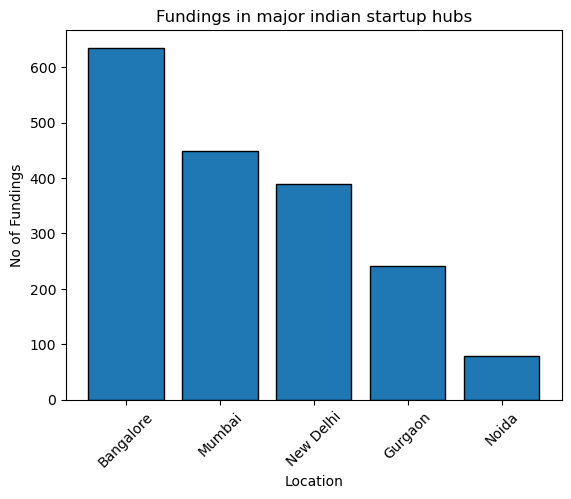

In [36]:
d = data.copy()

d['CityLocation'].dropna(inplace=True) # removing null values

def separateCity(city): # Function to apply cleaning in city location field, like banglore/dallas etc.
    if isinstance(city,str):
        if '/' not in city:
            return city.title().strip()
        return city.split('/')[0].strip().title()
    return city
d['CityLocation']=d['CityLocation'].apply(separateCity) # applying the separate city function

d[d['CityLocation']=='Delhi'] = 'New Delhi' # changing all occurences of 'Delhi' with 'New Delhi'

city_filtered_frame = d[d['CityLocation'].isin(['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Noida'])] # filtering dataframe for required locations
cities = city_filtered_frame['CityLocation'].value_counts() # finding no of startups fundings for the required cities
counts = cities.values
cities = cities.index
plt.bar(cities,counts,edgecolor='black') # plotting of bar graph
plt.xlabel('Location')
plt.ylabel('No of Fundings')
plt.title('Fundings in major indian startup hubs')
plt.xticks(rotation = 45)
plt.show()

### 2. Finding Top 5 Investors who invested maximum no. of times

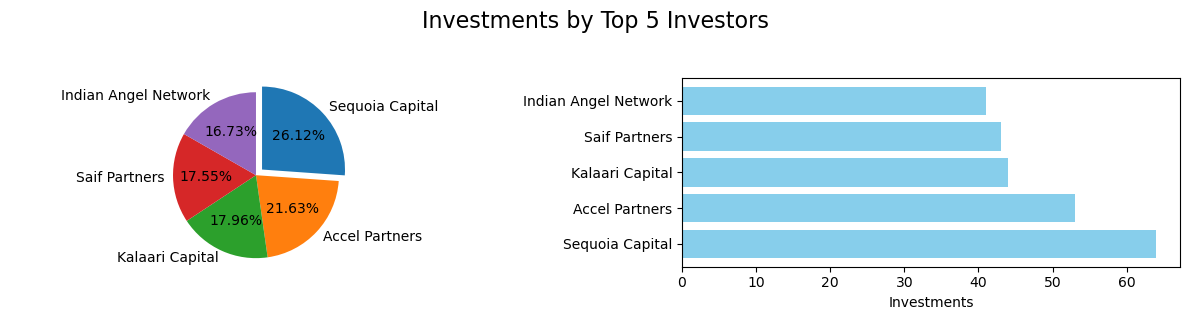

In [155]:
df = data.copy()
df['InvestorsName'].dropna(inplace = True) # Removing undiscloded investors

def createDict(array): # The function to create a mapping for each investor and no of investments
    dictionary = {}
    for i in array:
        if ',' not in i: # here ',' in csv file represents two or more investors so handling single investor case
            undisclosed = any(invstr in i.strip().title() for invstr in ['Undisclosed','Un disclosed'])
            if not undisclosed:
                
                if i.strip().title() in dictionary:
                    dictionary[i.strip().title()] = dictionary.get(i.strip().title())+1 # updating investment count
                #                                                                  if investor is already present in dictionary
                else:
                    
                    dictionary[i.strip().title()] = 1 # making new key for the investor
        else:
            string = i.strip().split(',') # Handling case of multiple investor in same funding round
            for j in string:
                if j.strip().title() in dictionary:
                    
                  
                    dictionary[j.strip().title()] = dictionary.get(j.strip().title()) +1  # executing Line 9 logic
                else:
                    undisclosed = any(invstr in j.strip().title() for invstr in ['Undisclosed','Un disclosed'])
                    if not undisclosed and j.strip().title()!='':
                        dictionary[j.strip().title()] = 1 # executing Line 12 logic
    return dictionary

# converting InvestorName column to numpy array of str type
dictionary = createDict(np.array(df['InvestorsName'],dtype='str'))

#List of tuples containing top 5 investors with investment count
l = sorted(dictionary.items(), key = lambda x:x[1], reverse=True)[:5] 

# Extract names and counts into separate lists for plotting
investors = [investor for investor, investment in l]
investments = [investment for investor, investment in l]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))

# Pie chart subplot
ax1.pie(investments, labels=investors, autopct='%.2f%%', counterclock=False, explode=(0.1, 0, 0, 0, 0), startangle=90)
ax1.axis('equal')

# Bar graph subplot
ax2.barh(investors, investments, color='skyblue')
ax2.set_xlabel('Investments')

# Set a single title for both subplots
fig.suptitle('Investments by Top 5 Investors', fontsize=16, y=1.05)

# Adjust layout for better visualization
plt.tight_layout()

plt.show()

### 3. Finding Top 5 investors who invested in different companies  
We will handle the important one startups for data cleaning - Ola, Flipkart, Oyo and Paytm.

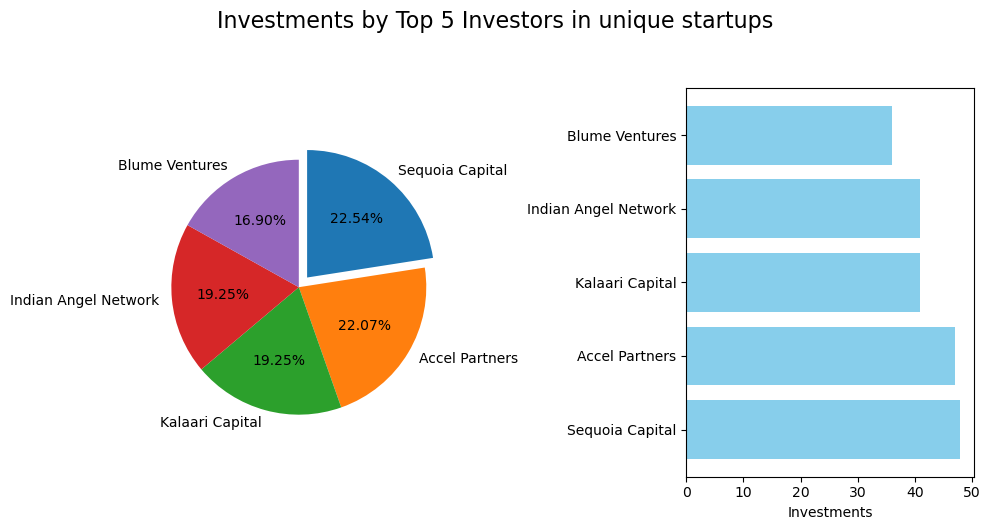

In [144]:
# We will use old df used in 2
# Data cleaning for important startups
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

df['StartupName'].apply(lambda x: str(x).title()) #Converting all namnes in title case

def createDict2(investorArray, startupArray): # The function to create dictinary of dictionaries
    
    dictionary = {} # dictinary = {investor1:{startup1: count, startup2:count}, investor2:{startup1: count, startup2: count}}
    
    for investor,startup in zip(investorArray,startupArray):
        if ',' not in investor: # here ',' in csv file represents two or more investors so handling single investor case
            undisclosed = any(invstr in investor.strip().title() for invstr in ['Undisclosed','Un disclosed'])
            if not undisclosed:
                if investor.strip().title() in dictionary: # if investorname is already present in dictionary
                    if startup.strip() not in dictionary[investor.strip().title()]:
                        dictionary[investor.strip().title()][startup.strip()] = 1 # updating investment count if investor is already present in dictionary
                    else:#                                                  in the particular startup
                        dictionary[investor.strip().title()][startup.strip()] += 1
                
                else:
                    
                    dictionary[investor.strip().title()] = {startup.strip():1} # making new key for the investor's unique startup
        else:
            string = investor.strip().split(',') # Handling case of multiple investor in same funding round
            for j in string:
                undisclosed = any(invstr in j.strip().title() for invstr in ['Undisclosed','Un disclosed'])
                if not undisclosed and j.strip().title()!='':
                    if j.strip().title() in dictionary:
                        if startup.strip() not in dictionary[j.strip().title()]:
                            dictionary[j.strip().title()][startup.strip()] = 1
                        else:
                            dictionary[j.strip().title()][startup.strip()] += 1
                        
                    else:
                        dictionary[j.strip().title()] = {startup.strip():1} 
    return dictionary

dictionary = createDict2(np.array(df['InvestorsName'],dtype='str'),np.array(df['StartupName'],dtype='str')) #passing value in fun
d={}
for investor in dictionary:
    d[investor] = len(dictionary[investor]) # making new dict with investor and investment count in different strtps
    
#List of tuples containing top 5 investors with investment count
l = sorted(d.items(), key = lambda x:x[1], reverse=True)[:5]

# Extract names and counts into separate lists for plotting
investors = [investor for investor, investment in l]
investments = [investment for investor, investment in l]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart subplot
ax1.pie(investments, labels=investors, autopct='%.2f%%', counterclock=False, explode=(0.1, 0, 0, 0, 0), startangle=90)
ax1.axis('equal')

# Bar graph subplot
ax2.barh(investors, investments, color='skyblue')
ax2.set_xlabel('Investments')

# Set a single title for both subplots
fig.suptitle('Investments by Top 5 Investors in unique startups', fontsize=16, y=1.05)

# Adjust layout for better visualization
plt.tight_layout()

plt.show()

### 4. Finding Top 5 investors investing in early stage startups  
- Filtering where funding type is seed funding or crowd funding
- Also making sure that the investors invest in unique startups

In [92]:
# we will use dataframe df 
# data cleaning on investor names and startup names is already done above
# applying data cleaning in InvestmentType
print(df['InvestmentType'].unique())

['Private Equity' 'Seed Funding' 'Debt Funding' nan 'SeedFunding'
 'PrivateEquity' 'Crowd funding' 'Crowd Funding']


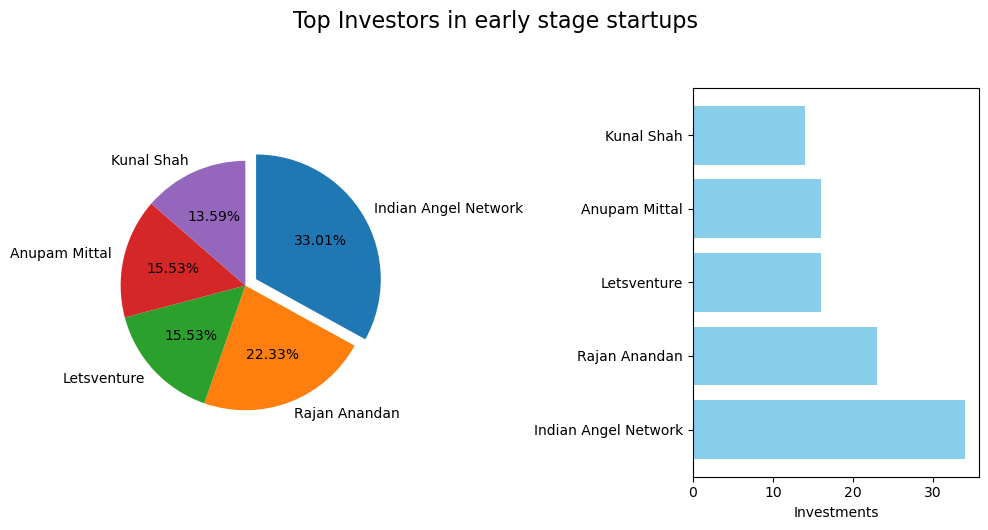

In [143]:
# Now applying transformations on InvestmentType
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
fdata = df.copy()
fdata = fdata[fdata['InvestmentType'].isin(['Seed Funding','Crowd Funding'])]
# Assuming 'InvestorsName' column needs to be filtered
fdata.loc[:, 'InvestorsName'] = fdata['InvestorsName'].str.strip().str.title()

# List of values to be dropped from 'InvestmentType'
values_to_drop = ['Group Of Angel Investors', 'Group Of Angel Investors From Us/India']

# Filter the DataFrame to exclude rows where 'InvestmentType' contains specified values
fdata = fdata[~fdata['InvestorsName'].isin(values_to_drop)]


#passing value in fun
fdata_dict = createDict2(np.array(fdata['InvestorsName'],dtype='str'),np.array(fdata['StartupName'],dtype='str'))
d={}
for investor in fdata_dict:
    d[investor] = len(fdata_dict[investor]) # making new dict with investor and investment count in different strtps
    
#List of tuples containing top 5 investors with investment count
l = sorted(d.items(), key = lambda x:x[1], reverse=True)[:5]

# Extract names and counts into separate lists for plotting
investors = [investor for investor, investment in l]
investments = [investment for investor, investment in l]


# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart subplot
ax1.pie(investments, labels=investors, autopct='%.2f%%', counterclock=False, explode=(0.1, 0, 0, 0, 0), startangle=90)
ax1.axis('equal')

# Bar graph subplot
ax2.barh(investors, investments, color='skyblue')
ax2.set_xlabel('Investments')

# Set a single title for both subplots
fig.suptitle('Top Investors in early stage startups', fontsize=16, y=1.05)

# Adjust layout for better visualization
plt.tight_layout()

plt.show()

### 5. Finding To 5 investors investing in Growth Stage Startups  
- Investment is of type private equity

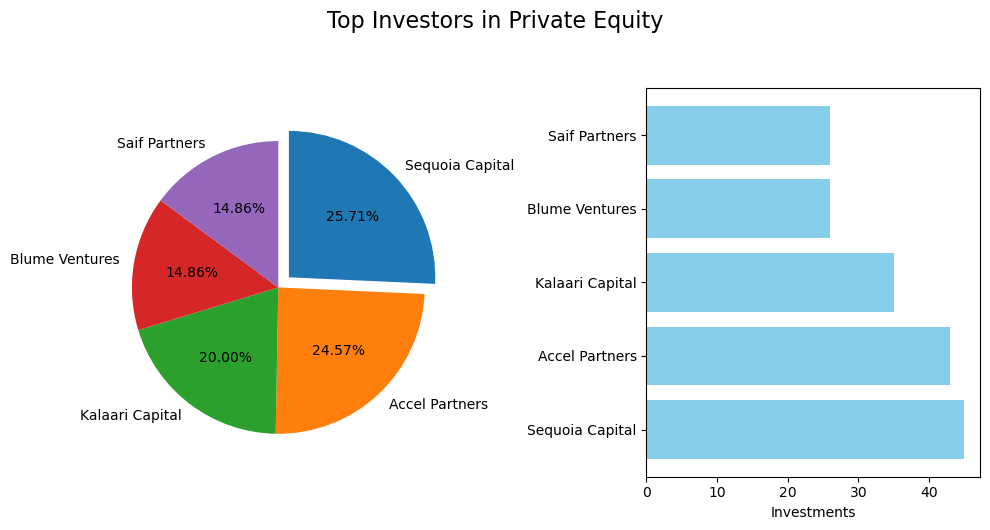

In [142]:
pvtdata = df.copy() # making copy of data
pvtdata = pvtdata[pvtdata['InvestmentType']=='Private Equity'] # filtering data for private equity
pvtdata_dict = createDict2(np.array(pvtdata['InvestorsName'],dtype='str'),np.array(pvtdata['StartupName'],dtype='str'))
d={}
for investor in pvtdata_dict:
    d[investor] = len(pvtdata_dict[investor]) # making new dict with investor and investment count in different strtps
    
#List of tuples containing top 5 investors with investment count
l = sorted(d.items(), key = lambda x:x[1], reverse=True)[:5]

# Extract names and counts into separate lists for plotting
investors = [investor for investor, investment in l]
investments = [investment for investor, investment in l]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart subplot
ax1.pie(investments, labels=investors, autopct='%.2f%%', counterclock=False, explode=(0.1, 0, 0, 0, 0), startangle=90)
ax1.axis('equal')

# Bar graph subplot
ax2.barh(investors, investments, color='skyblue')
ax2.set_xlabel('Investments')

# Set a single title for both subplots
fig.suptitle('Top Investors in Private Equity', fontsize=16, y=1.05)

# Adjust layout for better visualization
plt.tight_layout()

plt.show()